## 0. Code Setup and Helper Functions

### 0.1 Import all necessary packages

In [1]:
import os
import zlib
import pickle as pkl
import sklearn
import pandas as pd
from tabulate import tabulate
from top2vec import Top2Vec
import sys
import importlib

2022-07-03 13:01:49.721569: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-07-03 13:01:49.721590: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


### 0.2 Path Adjustments

In [2]:
assert os.path.exists('../src'), f"[ERROR] The path src not detected in the parent directory '{os.getcwd()}'."

if os.getcwd().endswith('/notebooks'):
    os.chdir('..')
    sys.path.append('./src')

print(f'[INFO] Current Directory: "{os.getcwd()}".')

[INFO] Current Directory: "/home/iceking/Desktop/22SS-TUM Lecture Docs/3. Praktikum (IN2106, IN4249)/Repo/topic-modeling-advancements".


## 1. Train

In [4]:
from src import top2vec_runner
importlib.reload(top2vec_runner)

args={
        'dataset': '20news',
        'num_topics': 20,

        ####### Top2Vec Specific Arguments - START #########
        # 'embedding_model': 'doc2vec',
        'embedding_model': 'universal-sentence-encoder',
        #'embedding_model': 'universal-sentence-encoder-large', # WORKS VERY WELL
        # 'embedding_model': 'distiluse-base-multilingual-cased',
        'doc2vec_speed': 'learn',
        'min_count': 50,
        'umap_args': {
            'n_neighbors': 15,
            'n_components': 5,
            'metric': 'cosine',
            'random_state': 42  # Try to always include this for reproducibility, github.com/ddangelov/Top2Vec/issues/86
        },
        'hdbscan_args': {
            'min_cluster_size': 15,
            'metric': 'euclidean',
            'cluster_selection_method': 'eom'
        },
        # ####### Top2Vec Specific Arguments - END #########
}

model, df_output_doc_topic, df_output_topic_word = top2vec_runner.parametric_run(args)

[INFO] Top2Vec Parameters:
{
    "dataset": "20news",
    "num_topics": 20,
    "embedding_model": "universal-sentence-encoder",
    "doc2vec_speed": "learn",
    "min_count": 50,
    "umap_args": {
        "n_neighbors": 15,
        "n_components": 5,
        "metric": "cosine",
        "random_state": 42
    },
    "hdbscan_args": {
        "min_cluster_size": 15,
        "metric": "euclidean",
        "cluster_selection_method": "eom"
    }
}
[INFO] The embedding model folder:"./pretrained_models/universal-sentence-encoder" found, so no need to download.
[INFO] The embedding model folder:"./pretrained_models/universal-sentence-encoder-multilingual" found, so no need to download.
[INFO] The embedding model folder:"./pretrained_models/universal-sentence-encoder-large" found, so no need to download.
[INFO] The embedding model folder:"./pretrained_models/universal-sentence-encoder-multilingual-large" found, so no need to download.
[INFO] Top2Vec is running for dataset:"20news".


2022-07-03 13:04:18,325 - top2vec - INFO - Pre-processing documents for training
2022-07-03 13:04:26,564 - top2vec - INFO - Loading universal-sentence-encoder model at ./pretrained_models/universal-sentence-encoder
2022-07-03 13:04:31,012 - top2vec - INFO - Creating joint document/word embedding
2022-07-03 13:04:52,444 - top2vec - INFO - Creating lower dimension embedding of documents
2022-07-03 13:05:24,394 - top2vec - INFO - Finding dense areas of documents
2022-07-03 13:05:24,748 - top2vec - INFO - Finding topics


[INFO] Original (Non-reduced) Number of Topics: 65.
[INFO] Topic #00:
     > From Reduced Model:True.
     > Topic Size:1057.
     > Topic Words: ['cmu' 'uiuc' 'univ' 'mit' 'freenet' 'acm' 'edu' 'ucsd' 'isc' 'plaintext'
		 'umich' 'uwa' 'microsystems' 'upenn' 'sfu' 'ia' 'ksu' 'pgp' 'ece' 'uc'
		 'ncsu' 'urbana' 'uwaterloo' 'caltech' 'monash' 'cryptography' 'regards'
		 'uq' 'programs' 'rsa' 'algorithm' 'mailer' 'carleton' 'ie' 'umass' 'sgi'
		 'assembly' 'northeastern' 'psu' 'truetype' 'rutgers' 'uci' 'org'
		 'universities' 'msu' 'rfc' 'networking' 'computing' 'gc' 'ufl']
     > Topic Word Scores: [0.2759818  0.27012968 0.25726    0.24653506 0.24546148 0.23674247
		 0.23470691 0.22479834 0.22058709 0.21876284 0.21869442 0.218119
		 0.21741492 0.2164535  0.20837286 0.20590755 0.20558068 0.20110212
		 0.20019358 0.1990366  0.19834183 0.19808376 0.19752419 0.19722234
		 0.1965333  0.19510666 0.19372125 0.19248262 0.19233415 0.19217414
		 0.19203638 0.18857266 0.18850367 0.18807353 0.1871

## 2. Print Outputs

In [5]:
df_output_doc_topic

run_id  Document ID  \
8405   1656846258            0   
9700   1656846258            1   
9677   1656846258            2   
10959  1656846258            3   
8418   1656846258            4   
...           ...          ...   
11039  1656846258        11309   
3919   1656846258        11310   
10889  1656846258        11311   
5803   1656846258        11312   
5474   1656846258        11313   

                                                Document          Real Label  \
8405   From: mathew <mathew@mantis.co.uk>\nSubject: R...         alt.atheism   
9700   From: keith@cco.caltech.edu (Keith Allan Schne...         alt.atheism   
9677   From: a137490@lehtori.cc.tut.fi (Aario Sami)\n...         alt.atheism   
10959  From: chrisb@seachg.com (Chris Blask)\nSubject...         alt.atheism   
8418   From:  (Rashid)\nSubject: Re: Yet more Rushdie...         alt.atheism   
...                                                  ...                 ...   
11039  From: system@kalki33.lakes.trenton.sc.us (Kalk...  talk.religion.misc   
3919   From: clavazzi@nyx.cs.du.edu (The_Doge)\nSubje...  talk.religion.misc   
10889  From: hudson@athena.cs.uga.edu (Paul Hudson Jr...  talk.religion.misc   
5803   From: jmeritt@mental.MITRE.ORG (Jim Meritt - S...  talk.religion.misc   
5474   From: Pegasus@aaa.uoregon.edu (Pegasus)\nSubje...  talk.religion.misc   

       Assigned Topic Num  Assignment Score  
8405                   11          0.516953  
9700                   14          0.458583  
9677                   14          0.520930  
10959                  18          0.585450  
8418                   11          0.497117  
...                   ...               ...  
11039                  18          0.444759  
3919                    4          0.676337  
10889                  18          0.630525  
5803                    6          0.455256  
5474                    6          0.598285  

[11314 rows x 6 columns]

In [6]:
with pd.option_context('display.max_colwidth', 100):
    display(df_output_topic_word)

run_id   method  \
0   1656846258  top2vec   
1   1656846258  top2vec   
2   1656846258  top2vec   
3   1656846258  top2vec   
4   1656846258  top2vec   
5   1656846258  top2vec   
6   1656846258  top2vec   
7   1656846258  top2vec   
8   1656846258  top2vec   
9   1656846258  top2vec   
10  1656846258  top2vec   
11  1656846258  top2vec   
12  1656846258  top2vec   
13  1656846258  top2vec   
14  1656846258  top2vec   
15  1656846258  top2vec   
16  1656846258  top2vec   
17  1656846258  top2vec   
18  1656846258  top2vec   
19  1656846258  top2vec   

                                                                                 method_specific_params  \
0   {'doc2vec_speed': 'learn', 'min_count': 50, 'embedding_model': 'universal-sentence-encoder', 'um...   
1   {'doc2vec_speed': 'learn', 'min_count': 50, 'embedding_model': 'universal-sentence-encoder', 'um...   
2   {'doc2vec_speed': 'learn', 'min_count': 50, 'embedding_model': 'universal-sentence-encoder', 'um...   
3   {'doc2vec_speed': 'learn', 'min_count': 50, 'embedding_model': 'universal-sentence-encoder', 'um...   
4   {'doc2vec_speed': 'learn', 'min_count': 50, 'embedding_model': 'universal-sentence-encoder', 'um...   
5   {'doc2vec_speed': 'learn', 'min_count': 50, 'embedding_model': 'universal-sentence-encoder', 'um...   
6   {'doc2vec_speed': 'learn', 'min_count': 50, 'embedding_model': 'universal-sentence-encoder', 'um...   
7   {'doc2vec_speed': 'learn', 'min_count': 50, 'embedding_model': 'universal-sentence-encoder', 'um...   
8   {'doc2vec_speed': 'learn', 'min_count': 50, 'embedding_model': 'universal-sentence-encoder', 'um...   
9   {'doc2vec_speed': 'learn', 'min_count': 50, 'embedding_model': 'universal-sentence-encoder', 'um...   
10  {'doc2vec_speed': 'learn', 'min_count': 50, 'embedding_model': 'universal-sentence-encoder', 'um...   
11  {'doc2vec_speed': 'learn', 'min_count': 50, 'embedding_model': 'universal-sentence-encoder', 'um...   
12  {'doc2vec_speed': 'learn', 'min_count': 50, 'embedding_model': 'universal-sentence-encoder', 'um...   
13  {'doc2vec_speed': 'learn', 'min_count': 50, 'embedding_model': 'universal-sentence-encoder', 'um...   
14  {'doc2vec_speed': 'learn', 'min_count': 50, 'embedding_model': 'universal-sentence-encoder', 'um...   
15  {'doc2vec_speed': 'learn', 'min_count': 50, 'embedding_model': 'universal-sentence-encoder', 'um...   
16  {'doc2vec_speed': 'learn', 'min_count': 50, 'embedding_model': 'universal-sentence-encoder', 'um...   
17  {'doc2vec_speed': 'learn', 'min_count': 50, 'embedding_model': 'universal-sentence-encoder', 'um...   
18  {'doc2vec_speed': 'learn', 'min_count': 50, 'embedding_model': 'universal-sentence-encoder', 'um...   
19  {'doc2vec_speed': 'learn', 'min_count': 50, 'embedding_model': 'universal-sentence-encoder', 'um...   

   dataset  num_given_topics  reduced  topic_num  topic_size  \
0   20news                20     True          0        1057   
1   20news                20     True          1        1042   
2   20news                20     True          2         988   
3   20news                20     True          3         770   
4   20news                20     True          4         739   
5   20news                20     True          5         649   
6   20news                20     True          6         601   
7   20news                20     True          7         586   
8   20news                20     True          8         524   
9   20news                20     True          9         499   
10  20news                20     True         10         494   
11  20news                20     True         11         491   
12  20news                20     True         12         458   
13  20news                20     True         13         417   
14  20news                20     True         14         394   
15  20news                20     True         15         373   
16  20news                20     True         16         341   
17  20news                20     True   

In [7]:
# First Documents
for i in sorted(df_output_topic_word['topic_num'].to_list()):
    x = df_output_doc_topic.query(f'`Assigned Topic Num` == {i}').sort_values(by ='Assignment Score',ascending=False).drop('run_id',axis=1).head()
    with pd.option_context('display.max_colwidth', None):
        display(x)

Document ID  \
0         3007   
1         3098   
2         2717   
3         7332   
4         1087   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            Document  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         From: mlee@eng.sdsu.edu (Mike Lee)\nSubject: Post script viewer\nOrganization: San Diego State University Computing Services\nLines: 8\nNNTP-Posting-Host: eng.sdsu.edu\nX-Newsreader: TIN [version 1.1 PL9]\n\nHello, recently I have been printing out a lot of files on school's laser printer and feeling guilty about it.  Please help me by showing me where to get a post script viewer for X-windows.  Thank you for your help.\n\n\n\n\n\nA student trying to enhence his cybernatic ability.\n\n   
1  From: chatterj@haji.lcs.mit.EDU (Shash Chatterjee)\nSubject: Help: SunView on olwm/xview3/X11R5\nArticle-I.D.: haji.9304051753.AA05339\nOrganization: The Internet\nLines: 23\nNNTP-Posting-Host: enterpoop.mit.edu\nTo: xpert%expo.lcs.mit.edu@fin.lcs.mit.edu\n\n\nHi,\n\nI just compiled the X11R5 distribution for a Sun3/SunOS4.1.1.  I also\ncompiled the public domain xview3 (with olwm) distribution.  I have some\nold 3rd-party application binaries that are SunView programs.  How do I\nget them to work under xview3 and olwm?  (I tried using the OpenWindows\nversion 2 "svenv" program, but it did not work.)\n\nI do not have news access....that's why I am mailing this directly.  Also,\nis there an email alias where my questions can get to comp.windows.x or\ncomp.windows.open-look?  PLEASE RESPOND TO fwr8bv@fin.af.mil\n\nThanks,\nShash\n\n+-----------------------------------------------------------------------------+\n+ Shash Chatterjee                               EMAIL:  fwr8bv@fin.af.mil    +\n+ EC Software                                   PHONE: 

Document ID  \
1057         5369   
1058         5586   
1059         6331   
1060         6017   
1061         5886   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               Document  \
1057                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

Document ID  \
2099         4718   
2100         4873   
2101         4713   
2102         5120   
2103         4685   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     Document  \
2099                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            From: behanna@syl.nj.nec.com (Chris BeHanna)\nSubject: Re: Wanted:  Advice on CB900 Custom purchase\nKeywords: CB900, purchase\nOrganization: NEC Systems Laboratory, Inc.\nLines: 22\n\nIn article <1993Apr14.204821.8497@linus.mitre.org> cookson@mbunix.mitre.org (Cookson) writes:\n>In article <93Apr14.185235.31833@acs.ucalgary.ca> parr@acs.ucalgary.ca (Charles Parr) writes:\n>>My mechanic once commented that the 'dual range' transmission was\n>>pure junk. One mans opinion...\n>>\n\n\tI had a friend in Pittsburgh who had a CB1000C with the dual-range\ntranny on it.  He usually only used the "economy" range to get an overdrive\nsixth gear out of it.  He had 59000 miles on it when it was stolen.  It was\nrecovered shortly after that, repaired, and, for all I know, it's still going\nstrong.\n\n\tThe CB1000C was a shaft-driven overbore version of the CB900 and was\nmade for exactly one year (yep, head and base g

Document ID  \
3087         3263   
3088         3163   
3089         1543   
3090         3181   
3091         1465   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

Document ID  \
3857         9861   
3858         6799   
3859         9602   
3860        11175   
3861         9429   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

Document ID  \
4596         8318   
4597         8357   
4598         8497   
4599         8198   
4600         8374   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

Document ID  \
5245          138   
5246          124   
5247        11037   
5248          273   
5249           63   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           Document  \
5245                                                              From: kmr4@po.CWRU.edu (Keith M. Ryan)\nSubject: Re: Where are they now?\nOrganization: Case Western Reserve University\nLines: 34\nDistribution: world\nNNTP-Posting-Host: b64635.student.cwru.edu\n\nIn article <1ql0d3$5vo@dr-pepper.East.Sun.COM> geoff@East.Sun.COM (Geoff Arnold @ Sun BOS - R.H. coast near the top) writes:\n\n>Your posting provoked me into checking my save file for memorable\n>posts. The first I captured was by Ken Arromdee on 19 Feb 1990, on the\n>subject "Re: atheist too?". That was article #473 here; your question\n>was article #53766, which is an average of about 48 articles a day for\n>the last three years. As others have noted, the current posting rate is\n>such that my kill file is depressing large...... Among the posting I\n>saved in the early days were articles from the following notables:\n\n\tHey, it might to interesting to read some of these posts...\nEspecially from ones who still regularly posts on alt.atheism!\n\n\n>>From: loren@sunlight.llnl.gov (Loren Petrich)\n>>From: jchrist@nazareth.israel.rel (Jesus Christ of Nazareth)\n>>From: mrc@Tomobiki-Cho.CAC.Washington.EDU (Mark Crispin)\n>>From: perry@apollo.HP.COM (Jim Perry)\n>>From: lippard@uavax0.ccit.arizona.edu (James J. Lippard)\n>>From: minsky@media.mit.edu (Marvin Minsky)\n>\n>An interesting bunch.... I wonder where #2 is?\n\n\tHee hee hee.\n\n\t*I* ain't going to say....\n\n--- \n\n        " Whatever promises that have been made can than be broken. "\n\n        John Laws, a man without the honor to keep his given word.\n\n\n   
5246  From: jcopelan@nyx.cs.du.edu (The One and Only)\nSubject: Re: Where are they now?\nOrganization: Salvation Army Draft Board\nLines: 31\n\nIn article <1ql0d3$5vo@dr-pepper.East.Sun.COM> geoff@East.Sun.COM writes:\n>Your posting provoked me into checking my save file for memorable\n>posts. The first I captured was by Ken Arromdee on 19 Feb 1990, on the\n>subject "Re: atheist too?". That was article #473 here; your question\n>was article #53766, which is an average of about 48 articles a day for\n>the last three years. As others have noted, the current posting rate is\n>such that my kill file is depressing large...... Among the posting I\n>saved in the e

Document ID  \
5846         1731   
5847         1894   
5848         2531   
5849         2318   
5850         2115   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       Document  \
5846                                                                                                                                                                                                                                                                                                                                                                

Document ID  \
6432         3637   
6433         3864   
6434         3451   
6435         3789   
6436         3879   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                Document  \
6432                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              From: gscott@b64542.STUDENT.CWRU.Edu (George Scott)\nSubject: Roland D-50 For Sale\nOrganization: Case Western Reserve University, Cleveland, Ohio, USA\nLines: 18\nDistribution: usa\nNNTP-Posting-Host: b64542.student.cwru.edu\n\nFor sale:\n\nRoland D-50: $700 or best offer.\nExcellent condition.\nIncludes over 1000 patches on disk (In cakewalk sysex format)\n\nBuyer must pay COD shipping.\n\nPlease e-mail responses to:\ngms2@po.cwru.edu\n\nThanks.\n\nGeorge\n\n-- \nGeorge Scott (gscott@b64542.student.cwru.edu)\n             (gms2@po.cwru.edu)\n   
6433  From: hickson@pop.psu.edu (Darryl Hickson)\nSubject: DJ Equipment, NES Carts, Cordless Phone FOR SALE (Lower Prices)\nArticle-I.D.: genesis.1prc95$u10\nDistribution: usa\nOrganization: Penn State Population Research Institute\nLines: 35\nNNTP-Posting-Host: zelinski.pop.psu.edu\n\nI have a few thi

Document ID  \
6956         8141   
6957         7760   
6958         7730   
6959         7764   
6960         7713   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           Document  \
6956                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  From: geb@cs.pitt.edu (Gordon Banks)\nSubject: Re: How to Diagnose Lyme... really\nReply-To: geb@cs.pitt.edu (Gordon Banks)\nOrganization: Univ. of Pittsburgh Computer Science\nLines: 20\n\n\nIn article <1993Apr12.201056.20753@ns1.cc.lehigh.edu> mcg2@ns1.cc.lehigh.edu (Marc Gabriel) writes:\n\n>Now, I'm not saying that culturing is the best way to diagnose; it's very\n>hard to culture Bb in most cases.  The point is that Dr. N has developed a\n>"feel" for what is and what isn't LD.  This comes from years of experience.\n>No serology can match that.  Unfortunately, some would call Dr. N a "quack"\n>and accuse him of trying to make a quick buck.\n>\nWhy do you think he would be called a quack?  The quacks don't do cultures.\nThey poo-poo doing more lab tests:  "this is Lyme, believe me, I've\nseen it many times.  The lab tests aren't accurate.  We'll treat it\nnow."  Also, is Dr. N's practice almost exclusively devoted to treating\nLyme patients?  I don't know *any* orthopedic surgeons who fit this\npattern.  They are usually GPs.\n-- \n----------------------------------------------------------------------------\nGordon Banks  N3JXP      | "Skept

Document ID  \
7455         6787   
7456         6415   
7457         6474   
7458         6461   
7459         6661   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

Document ID  \
7949         9991   
7950        10019   
7951         9908   
7952        10020   
7953        10383   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

Document ID  \
8440         7442   
8441         7458   
8442         7341   
8443         7144   
8444         7574   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          Document  \
8440                             

Document ID  \
8898        10862   
8899         9603   
8900        10809   
8901        10580   
8902        10705   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             Document  \
8898                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             From: gsh7w@fermi.clas.Virginia.EDU (Greg Hennessy)\nSubject: Re: Why not concentrate on child molesters?\nOrganization: University of Virginia\nLines: 15\n\nIn article <15416@optilink.COM> cramer@optilink.COM (Clayton Cramer) writes:\n#That describes some straights -- and nearly all homosexual males.\n\nCan you provide any evidence that doesn't ahve massive selection\neffects?\n\nNo, I thought not.\n\nJust slander on your part.\n\n--\n-Greg Hennessy, University of Virginia\n USPS Mail:     Astronomy Department, Charlottesville, VA 22903-2475 USA\n Internet:      gsh7w@virginia.edu  \n UUCP:\t\t...!uunet!virginia!gsh7w\n   
8899                                                                                                                                                                                                                                                                                                                                                               From: strait@cheetah.csl.uiuc.edu (Jeffrey C. Strait)\nSubject: Re: Who's next?  Mormons and Jews?\nOrganization: The University of Illinois\nLines: 17\nDistribution: world\nNNTP-Posting-Host: cheetah.csl.uiuc.edu\n\nIn article <1r24bv$dif@apple.com>, earlw@apple.com (Earl Wallace) writes:\n\n> >The Koreshians rubbed themselves out.  Neither Mormons nor Jews have a\n> >propensity for dousing themselves with kerosene, so I'm not particularly\n> >concerned.  (Or shall we blame Jim Jones on the government also?)\n> >...\n\nIt is silly to make this statement.  Fifteen minutes after the fire\nstarted, the "official word" ou

Document ID  \
9315          339   
9316        11293   
9317          186   
9318           35   
9319         9282   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

Document ID  \
9709         2804   
9710         2611   
9711         2510   
9712         2409   
9713         2762   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

Document ID  \
10082         1699   
10083         1654   
10084         1965   
10085         1374   
10086         1392   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   Document  \
10082  From: dcoleman@utxvms.cc.utexas.edu (Daniel M. Coleman)\nSubject: Re: Do the 2MB ATI Ultra Pro 16 and 24 bit Windows Drivers Work?\nLines: 47\nNntp-Posting-Host: ecru.cc.utexas.edu\nOrganization: The University of Texas at Austin\nLines: 47\n\nIn article <87402@ut-emx.uucp>, reza@magellan.ae.utexas.edu (Alireza Vali) writes:\n> Hi there.  We just bought a 486 DX2/66 Gateway system with a 2 meg ATI\n> Ultra Pro video card.  Everything seems to work fine except for the\n> Windows Drivers for 800x600 24 bit, and 800x600 and 1024x768 16 bit\n> modes.  The fonts and icons start deteriorating after windows startup,\n> and within minutes of use, everything on the screen is totally\n> unintelligible.  Naturally, I called Gateway tech support to inquire\n> about this.  The technician asked me about the drivers, and I told him it\n> was version 1.5, build 59.  He told me that the 16 and 24 bit drivers for\n> the ATI Ultra Pro simply do not work!!!  Is this true?  If so, I'm simply\n> amazed.  How could this be?  The strange thing is I would have expected\n> to see some discussion on here (unless the subject has made the FAQ!!!).\n> \n> One very suspicious point that came 

Document ID  \
10423         9856   
10424         9484   
10425         9606   
10426         9827   
10427         9727   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  

Document ID  \
10744         8989   
10745         9129   
10746         9312   
10747         8916   
10748         8907   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  

Document ID  \
11046         8994   
11047         9007   
11048        10966   
11049           13   
11050        11308   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  

## 3. Visualization

### Draw Topic Similarity Matrix

In [8]:
import importlib
from src import visualizer; importlib.reload(visualizer)

visualizer.visualize_heatmap(
    model=model,
    df_output_doc_topic=df_output_doc_topic,
    df_output_topic_word=df_output_topic_word,
    topics= None,
    top_n_topics = None,
    n_clusters = None, # Unknown for now
    width = 1000,
    height = 1000
)

### Draw Labels per Topic

In [9]:
from src import visualizer; importlib.reload(visualizer)
visualizer.visualize_labels_per_topic(df_output_doc_topic=df_output_doc_topic,
                               df_output_topic_word=df_output_topic_word,top_n_topics=10)

### Draw 2D Document Vectors 

[INFO] UMAP Arguments for Visualization:{'n_neighbors': 15, 'n_components': 2, 'metric': 'cosine', 'random_state': 42}
[INFO] UMAP Model is being fitted..
[INFO] UMAP Model successfully fitted.


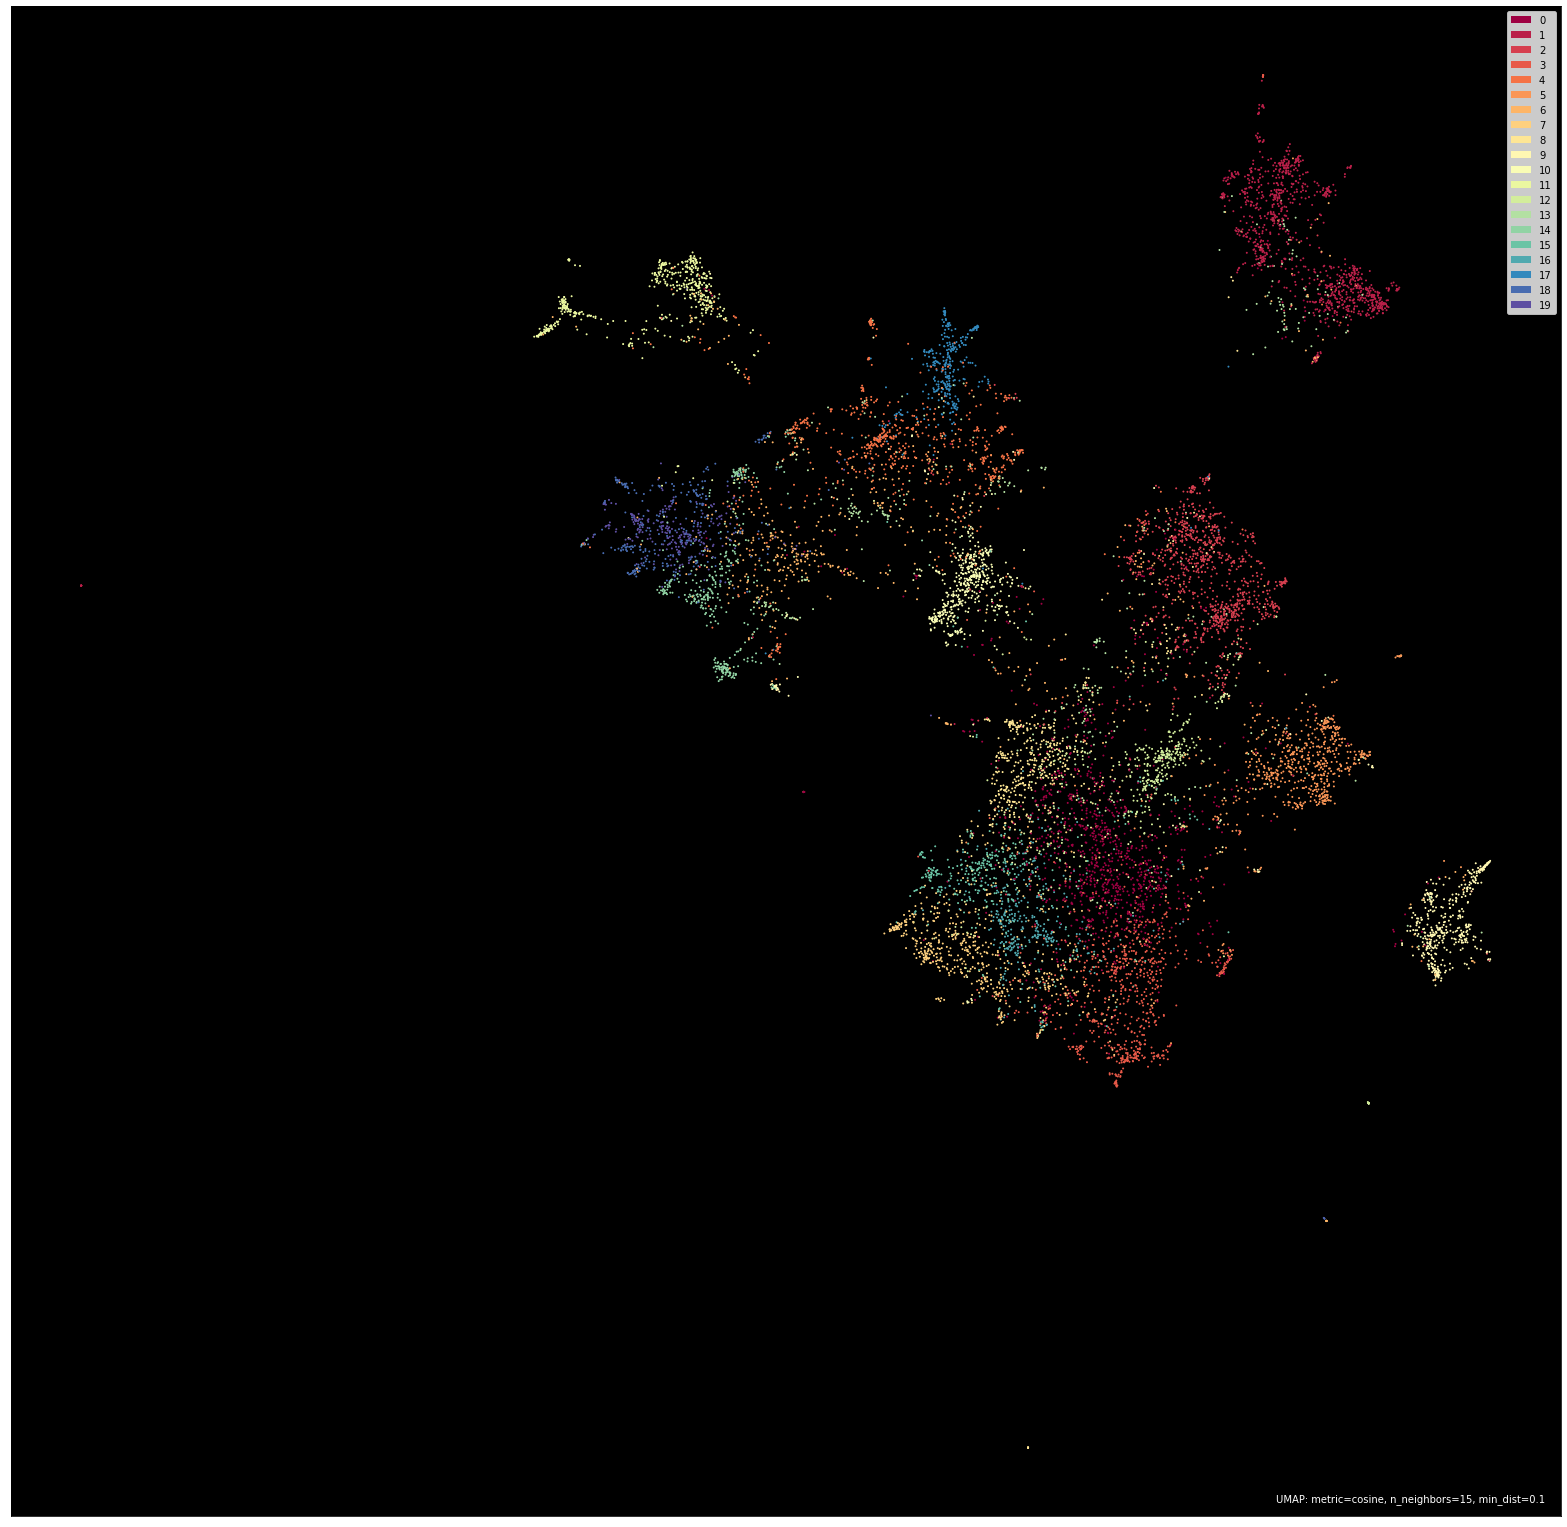

In [10]:
from src import visualizer
importlib.reload(visualizer)

_ = visualizer.draw_umap2d_scatter_plot(model=model, df_output_topic_word=df_output_topic_word, target_dir= './output/visualization')

### Topic Words

In [11]:
from src import visualizer
importlib.reload(visualizer)

visualizer.visualize_barchart(df_output_topic_word=df_output_topic_word,n_words=5)

## Evaluation Part (Draft)

### Topic-Label Distribution

In [12]:
for i in range(len(df_output_topic_word)):
    print(f'Topic {i}:')
    print(df_output_doc_topic.query(f'`Assigned Topic Num` == {i}') ['Real Label'].value_counts())
    print('-'*32)

Topic 0:
comp.graphics               191
comp.os.ms-windows.misc     170
comp.windows.x              150
comp.sys.mac.hardware       104
comp.sys.ibm.pc.hardware     88
sci.electronics              82
misc.forsale                 64
sci.space                    35
rec.autos                    30
sci.med                      27
rec.sport.hockey             22
sci.crypt                    22
rec.motorcycles              22
rec.sport.baseball           21
talk.politics.mideast        10
soc.religion.christian        9
talk.politics.misc            5
talk.religion.misc            3
talk.politics.guns            2
Name: Real Label, dtype: int64
--------------------------------
Topic 1:
rec.sport.hockey           540
rec.sport.baseball         479
comp.os.ms-windows.misc     11
misc.forsale                 3
sci.med                      3
talk.politics.misc           2
alt.atheism                  1
rec.autos                    1
sci.electronics              1
talk.politics.guns           1


In [13]:
a = []
for i in range(len(df_output_topic_word)):
    a.append(f'Topic {i}:')
    a.append(str(df_output_doc_topic.query(f'`Assigned Topic Num` == {i}') ['Real Label'].value_counts()))
    a.append('-'*32)
a = '\n'.join(a)

In [14]:
def foo():
    for line in a.splitlines():
        if line != '-'*32:
            print(line)
        else:
            yield ''

In [15]:
x = foo()
next(x)

Topic 0:
comp.graphics               191
comp.os.ms-windows.misc     170
comp.windows.x              150
comp.sys.mac.hardware       104
comp.sys.ibm.pc.hardware     88
sci.electronics              82
misc.forsale                 64
sci.space                    35
rec.autos                    30
sci.med                      27
rec.sport.hockey             22
sci.crypt                    22
rec.motorcycles              22
rec.sport.baseball           21
talk.politics.mideast        10
soc.religion.christian        9
talk.politics.misc            5
talk.religion.misc            3
talk.politics.guns            2
Name: Real Label, dtype: int64


''

In [16]:
next(x)

Topic 1:
rec.sport.hockey           540
rec.sport.baseball         479
comp.os.ms-windows.misc     11
misc.forsale                 3
sci.med                      3
talk.politics.misc           2
alt.atheism                  1
rec.autos                    1
sci.electronics              1
talk.politics.guns           1
Name: Real Label, dtype: int64


''

In [ ]:
next(x)

In [34]:
next(x)

Topic 3:
alt.atheism                 112
talk.religion.misc           95
soc.religion.christian       69
talk.politics.mideast        53
rec.motorcycles              43
misc.forsale                 32
sci.med                      31
comp.graphics                30
talk.politics.guns           30
sci.crypt                    27
rec.sport.baseball           24
rec.autos                    22
talk.politics.misc           22
comp.windows.x               21
sci.space                    20
comp.sys.mac.hardware        15
sci.electronics              14
rec.sport.hockey             14
comp.os.ms-windows.misc      12
comp.sys.ibm.pc.hardware      8
Name: Real Label, dtype: int64


''

In [35]:
next(x)

Topic 4:
misc.forsale                123
rec.sport.baseball           70
rec.autos                    51
rec.motorcycles              45
sci.electronics              44
talk.politics.misc           41
comp.sys.mac.hardware        36
comp.graphics                36
comp.windows.x               36
rec.sport.hockey             29
comp.os.ms-windows.misc      29
sci.space                    23
soc.religion.christian       21
sci.med                      21
comp.sys.ibm.pc.hardware     21
talk.politics.guns           20
talk.politics.mideast        11
talk.religion.misc           10
sci.crypt                     9
alt.atheism                   5
Name: Real Label, dtype: int64


''

In [36]:
next(x)

Topic 5:
rec.motorcycles           306
rec.autos                 274
sci.electronics            18
misc.forsale               10
talk.politics.misc          5
soc.religion.christian      4
talk.politics.guns          4
alt.atheism                 4
sci.space                   2
talk.religion.misc          1
rec.sport.hockey            1
comp.sys.mac.hardware       1
comp.windows.x              1
rec.sport.baseball          1
Name: Real Label, dtype: int64


''

In [37]:
next(x)

Topic 6:
sci.med                    492
rec.autos                    7
sci.space                    6
soc.religion.christian       5
alt.atheism                  4
talk.politics.mideast        4
talk.politics.guns           3
comp.graphics                2
comp.sys.mac.hardware        2
comp.windows.x               2
rec.motorcycles              2
sci.crypt                    2
sci.electronics              1
comp.os.ms-windows.misc      1
talk.politics.misc           1
talk.religion.misc           1
Name: Real Label, dtype: int64


''

In [38]:
next(x)

Topic 7:
sci.crypt                   440
sci.electronics              23
comp.windows.x               10
rec.autos                     8
comp.graphics                 3
comp.sys.ibm.pc.hardware      3
talk.politics.misc            2
comp.sys.mac.hardware         2
talk.politics.mideast         2
talk.politics.guns            2
rec.motorcycles               1
misc.forsale                  1
Name: Real Label, dtype: int64


''

In [39]:
next(x)

Topic 8:
talk.politics.misc        219
sci.crypt                  46
talk.politics.guns         28
sci.space                  10
alt.atheism                 8
talk.politics.mideast       6
rec.motorcycles             5
rec.autos                   5
sci.med                     4
soc.religion.christian      2
talk.religion.misc          2
sci.electronics             1
rec.sport.hockey            1
comp.sys.mac.hardware       1
rec.sport.baseball          1
misc.forsale                1
Name: Real Label, dtype: int64


''

In [40]:
next(x)

Topic 9:
talk.politics.mideast     298
alt.atheism                 5
talk.politics.misc          4
talk.religion.misc          3
soc.religion.christian      3
rec.sport.baseball          2
Name: Real Label, dtype: int64


''

In [41]:
next(x)

Topic 10:
alt.atheism               134
soc.religion.christian     93
talk.religion.misc         58
sci.med                     6
talk.politics.misc          3
sci.space                   1
Name: Real Label, dtype: int64


''

In [42]:
next(x)

Topic 11:
talk.politics.guns    260
sci.crypt              14
rec.autos               5
rec.motorcycles         4
talk.politics.misc      3
misc.forsale            2
sci.electronics         1
talk.religion.misc      1
Name: Real Label, dtype: int64


''

In [43]:
next(x)

Topic 12:
talk.politics.guns        160
talk.religion.misc         46
talk.politics.misc         12
sci.crypt                   9
soc.religion.christian      7
talk.politics.mideast       6
rec.autos                   4
sci.electronics             3
alt.atheism                 3
rec.motorcycles             2
sci.med                     1
sci.space                   1
Name: Real Label, dtype: int64


''

In [44]:
next(x)

Topic 13:
soc.religion.christian    112
talk.religion.misc         44
alt.atheism                40
Name: Real Label, dtype: int64


''

In [45]:
next(x)

Topic 14:
talk.politics.mideast     164
soc.religion.christian      5
alt.atheism                 2
talk.politics.misc          2
Name: Real Label, dtype: int64


''

In [46]:
next(x)

Topic 15:
talk.politics.misc        70
alt.atheism               32
talk.politics.guns        18
rec.motorcycles           12
sci.crypt                  8
talk.politics.mideast      6
talk.religion.misc         5
rec.autos                  4
soc.religion.christian     3
rec.sport.baseball         2
comp.sys.mac.hardware      1
rec.sport.hockey           1
Name: Real Label, dtype: int64


''

In [47]:
next(x)

Topic 16:
alt.atheism               95
talk.religion.misc        30
soc.religion.christian    21
talk.politics.mideast      9
talk.politics.misc         4
talk.politics.guns         2
Name: Real Label, dtype: int64


''

In [48]:
next(x)

Topic 17:
soc.religion.christian    119
talk.religion.misc         34
alt.atheism                 4
Name: Real Label, dtype: int64


''

In [49]:
next(x)

Topic 18:
soc.religion.christian    115
talk.religion.misc         27
alt.atheism                10
Name: Real Label, dtype: int64


''

In [50]:
next(x)

Topic 19:
talk.politics.misc        68
soc.religion.christian    17
alt.atheism               17
talk.religion.misc        16
talk.politics.guns         1
sci.med                    1
comp.graphics              1
Name: Real Label, dtype: int64


''

### Diversity and Coherence

In [51]:
from octis.evaluation_metrics.diversity_metrics import TopicDiversity
from octis.evaluation_metrics.coherence_metrics import Coherence

In [52]:
from src.utils import load_documents
documents,_ = load_documents('./data/20news_bydate','text')

In [53]:
model_output = {"topics":df_output_topic_word['topic_words'].tolist()}
metric_diversity = TopicDiversity()
metric_coherence = Coherence(texts = [d.split(" ") for d in documents], measure = "c_v")
score_diversity = metric_diversity.score(model_output)
score_coherence = metric_coherence.score(model_output)
print(f'> score_diversity={"%.4f" % score_diversity},score_coherence={"%.4f" %score_coherence}')

> score_diversity=0.8650,score_coherence=0.3757


In [ ]:
# -----------------------

In [45]:


model_output = {"topics":[topic_stat['topic_words'] for topic_stat in topic_stats]}


for topk_val in range(1,30):
    metric_diversity = TopicDiversity(topk=topk_val)
    metric_coherence = Coherence(texts = [d.split(" ") for d in documents], topk = topk_val, measure = "c_v")
    score_diversity = metric_diversity.score(model_output)
    score_coherence = metric_coherence.score(model_output)
    print(f'> topk={topk_val},score_diversity={"%.2f" % score_diversity},score_coherence={"%.2f" %score_coherence}')

> topk=1,score_diversity=1.00,score_coherence=1.00
> topk=2,score_diversity=0.75,score_coherence=0.33
> topk=3,score_diversity=0.67,score_coherence=0.26
> topk=4,score_diversity=0.62,score_coherence=0.40
> topk=5,score_diversity=0.60,score_coherence=0.40
> topk=6,score_diversity=0.58,score_coherence=0.40
> topk=7,score_diversity=0.57,score_coherence=0.40
> topk=8,score_diversity=0.62,score_coherence=0.40
> topk=9,score_diversity=0.61,score_coherence=0.40
> topk=10,score_diversity=0.55,score_coherence=0.40
> topk=11,score_diversity=0.55,score_coherence=0.40
> topk=12,score_diversity=0.54,score_coherence=0.40
> topk=13,score_diversity=0.54,score_coherence=0.40
> topk=14,score_diversity=0.54,score_coherence=0.40
> topk=15,score_diversity=0.53,score_coherence=0.40
> topk=16,score_diversity=0.56,score_coherence=0.40
> topk=17,score_diversity=0.56,score_coherence=0.40
> topk=18,score_diversity=0.53,score_coherence=0.40
> topk=19,score_diversity=0.50,score_coherence=0.40


Exception: Words in topics are less than 20

## experimento starto

In [413]:
model.topic_vectors_reduced

array([[ 0.01390235,  0.05915347,  0.04434921, ...,  0.02213916,
         0.01450342, -0.10210229],
       [ 0.01451421,  0.02415742, -0.00312092, ..., -0.02797477,
         0.07043923, -0.07264944],
       [ 0.02131955,  0.06394333,  0.05752455, ..., -0.01420835,
         0.04519297, -0.04823872],
       ...,
       [-0.02615882, -0.01710461, -0.0357969 , ..., -0.07702263,
        -0.02440679,  0.01505412],
       [ 0.07957482, -0.0119744 ,  0.0439383 , ...,  0.01826399,
        -0.00548598, -0.00761518],
       [ 0.0847543 ,  0.08975127,  0.04372289, ...,  0.02453902,
         0.03861566, -0.02495744]], dtype=float32)

In [419]:
a = model.topic_vectors_reduced if df_output_topic_word['reduced'][0] else model.topic_vectors

a.shape

(20, 300)

In [ ]:
model.tf

In [416]:
model.topic_vectors.shape

(171, 300)

In [425]:
df_output_doc_topic

run_id  Document ID  \
2640  1656806807            0   
4934  1656806807            1   
5022  1656806807            2   
5007  1656806807            3   
5225  1656806807            4   
...          ...          ...   
3868  1656806807        11309   
2664  1656806807        11310   
3382  1656806807        11311   
3589  1656806807        11312   
1080  1656806807        11313   

                                               Document          Real Label  \
2640  From: mathew <mathew@mantis.co.uk>\nSubject: R...         alt.atheism   
4934  From: keith@cco.caltech.edu (Keith Allan Schne...         alt.atheism   
5022  From: a137490@lehtori.cc.tut.fi (Aario Sami)\n...         alt.atheism   
5007  From: chrisb@seachg.com (Chris Blask)\nSubject...         alt.atheism   
5225  From:  (Rashid)\nSubject: Re: Yet more Rushdie...         alt.atheism   
...                                                 ...                 ...   
3868  From: system@kalki33.lakes.trenton.sc.us (Kalk...  talk.religion.misc   
2664  From: clavazzi@nyx.cs.du.edu (The_Doge)\nSubje...  talk.religion.misc   
3382  From: hudson@athena.cs.uga.edu (Paul Hudson Jr...  talk.religion.misc   
3589  From: jmeritt@mental.MITRE.ORG (Jim Meritt - S...  talk.religion.misc   
1080  From: Pegasus@aaa.uoregon.edu (Pegasus)\nSubje...  talk.religion.misc   

      Assigned Topic Num  Assignment Score  
2640                   2          0.348347  
4934                   5          0.434869  
5022                   5          0.397296  
5007                   5          0.401678  
5225                   5          0.334094  
...                  ...               ...  
3868                   3          0.306622  
2664                   2          0.345125  
3382                   3          0.424614  
3589                   3          0.361049  
1080                   0          0.272105  

[11314 rows x 6 columns]

In [426]:
df_output_doc_topic.groupby('run_id')['Real Label'].count()

run_id
1656806807    11314
Name: Real Label, dtype: int64

In [439]:
freq_df = df_output_doc_topic[['Assigned Topic Num','Real Label']].rename(columns={'Assigned Topic Num':'Topic'})
freq_df = freq_df.groupby('Topic')['Real Label'].count().reset_index(name='Count')
freq_df

Topic  Count
0       0   1342
1       1   1032
2       2    928
3       3    817
4       4    666
5       5    650
6       6    641
7       7    463
8       8    452
9       9    446
10     10    435
11     11    423
12     12    420
13     13    401
14     14    395
15     15    370
16     16    368
17     17    365
18     18    360
19     19    340

In [422]:
df_output_doc_topic[['Real Label', 'Assigned Topic Num']].value_counts().reset_index().sort_values('Real Label')

Real Label  Assigned Topic Num    0
93          alt.atheism                  13   17
242         alt.atheism                  17    3
260         alt.atheism                   1    2
261         alt.atheism                   4    2
6           alt.atheism                   5  352
..                  ...                 ...  ...
46   talk.religion.misc                  13   60
44   talk.religion.misc                   5   62
174  talk.religion.misc                   4    6
281  talk.religion.misc                  10    1
173  talk.religion.misc                   1    6

[329 rows x 3 columns]

In [421]:
freq_df

Real Label              Assigned Topic Num
rec.sport.hockey        4                     505
comp.windows.x          6                     447
sci.crypt               10                    409
rec.sport.baseball      8                     392
soc.religion.christian  3                     368
                                             ... 
talk.politics.guns      15                      1
                        16                      1
                        18                      1
comp.sys.mac.hardware   10                      1
rec.sport.baseball      14                      1
Length: 329, dtype: int64

In [465]:
topics = [0,3,5,6]

In [469]:
sorted_topics = [0,2,3,4,5,6,19]

In [470]:
df_output_topic_word['5_words'] = df_output_topic_word['topic_words'].apply(lambda ws: '_'.join(ws[:5]))
df_output_topic_word['Name'] = df_output_topic_word['topic_num'].astype(str) + '_' + df_output_topic_word['5_words']
topic_num_to_names = df_output_topic_word.set_index('topic_num').to_dict(into=OrderedDict)['Name']
topic_names = [topic_num_to_names[topic] for topic in sorted_topics]
new_labels = [label if len(label) < 30 else label[:27] + "..." for label in topic_names]

In [471]:
new_labels


['0_sale_offer_space_shipping...',
 '2_gun_crime_nra_guns_firearms',
 '3_jesus_christ_scriptures_g...',
 '4_playoffs_hockey_nhl_playo...',
 '5_atheists_atheist_theists_...',
 '6_application_window_openwi...',
 '19_simm_simms_nubus_centris...']

'top2vec'

## experimento finito